In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import*
from sklearn import*


# sklearn 10FCV
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split


# Keras
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import GaussianNoise
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

seed = 1
# fix random seed for reproducibility
np.random.seed(seed)
tf.random.set_seed(seed)


filename = "adult.csv"
data = pd.read_csv(filename)

plt.rcParams["figure.figsize"] = (12,8)

In [ ]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
# Used to label encode categorical values
labelencoder = LabelEncoder()


#
# print head prior to encoding
#

print(data.describe())

print("\n\n Missing values (?)")
print((data == '?').sum())

# Converting missing data to NaN
data.replace('?', np.nan, inplace=True)

# here we are dropping the NaN values, this is not ideal, and you will be asked questions on this later
data.dropna(inplace=True)

print("\n\n Missing values (?) after del")
print((data == '?').sum())


# This code identifies columns that need label encoding, and are then formatted if they do
print("\n\nColumn Names & formatting:\n")
for col in data.columns.values.tolist():
    if data[col].dtype == "object" or data[col].dtype == "bool":
        print("{:<30}".format(col), ":", "{:<30}".format(str(data[col].dtype)) , "Formatting to LabelEncoding")
        data[col] = labelencoder.fit_transform(data[col])
    else:
        print("{:<30}".format(col), ":", "{:<30}".format(str(data[col].dtype)) , "No formatting required.")


# Convert to array
array = data.values


# get seperated input and classifies, using a deep copy of a list, this is for ML models
X = array[:,0:14]
Y = array[:,14]


# Optional: to speed up deep learning model training - try this after algorithm development if the results are poor.
#----------------------------------------------------------
# Normalizing the input values (excluding the class value)
#scaler = preprocessing.Normalizer().fit(X)
#X = scaler.transform(X)

#
# print head post encoding
#

data.describe()

                age        fnlwgt  education.num  capital.gain  capital.loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours.per.week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


 Missing values (?)
age                  0
workclass         

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,30162.000000,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,2.199324,1.897938e+05,10.333764,10.121312,2.580134,5.959850,1.418341,3.678602,0.675685,1092.007858,88.372489,40.931238,36.382567,0.248922
std,13.134665,0.953925,1.056530e+05,3.812292,2.549995,1.498016,4.029566,1.601338,0.834709,0.468126,7406.346497,404.298370,11.979984,6.105372,0.432396
min,17.000000,0.000000,1.376900e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.000000,1.176272e+05,9.000000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,2.000000,1.784250e+05,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,47.000000,2.000000,2.376285e+05,12.000000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,6.000000,1.484705e+06,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


In [ ]:
# We are using stratification here, this startifies based on class values.
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, test_size=0.33, random_state=seed, shuffle = True, stratify=(Y))


# Examine the class breakdown per dataset:

print("Training dataset length:", len(X_train))
print("Testing dataset length:", len(X_test))

class1TrainingPer = np.count_nonzero(Y_train == 1) / len(X_train)
class1TestPer = np.count_nonzero(Y_test == 1) / len(X_test)

print("\nPercentage of 1's in Training data: ", round(class1TrainingPer*100,2), "%")
print("Percentage of 1's in Test data    : ", round(class1TestPer*100,2), "%")

Training dataset length: 20208
Testing dataset length: 9954

Percentage of 1's in Training data:  24.89 %
Percentage of 1's in Test data    :  24.89 %


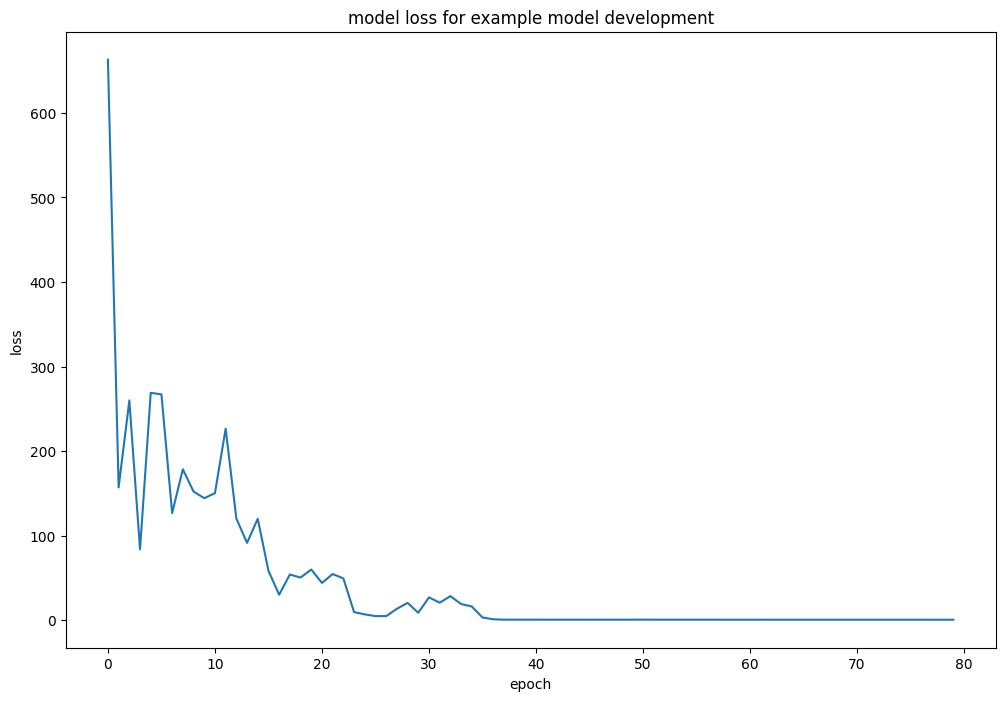

312/312 [==============================] - 1s 2ms/step - loss: 0.5018 - acc: 0.7903
Acuracy:  0.7903355360031128
312/312 [==============================] - 1s 2ms/step
Predicted     0    1   All
Actual                    
0          7394   82  7476
1          2005  473  2478
All        9399  555  9954



In [ ]:
# Need to rerun seed for each DL cell
tf.random.set_seed(seed)



# Building the neural network
modeldl = Sequential()
# First layer has 14 features as input and has 1000 perceptrons, it is using ReLu (do not change this) as an activation function
modeldl.add(Dense(1000, input_dim=14, activation='relu'))

# The following three layers have 100,100 and 50 perceptrons, they are also using ReLu (do not change this) as an activation function
# if you are tunning the network, you can modifiy the layers here, add remove of change the number of perceptrons.
modeldl.add(Dense(100, activation='relu'))
modeldl.add(Dense(100, activation='relu'))
modeldl.add(Dense(50, activation='relu'))

# The output layer has one neuron and sigmoid is the output activation function - do not change these.
modeldl.add(Dense(1, activation='sigmoid'))


# Compile model - do not change the loss function of metrics, you can change the optimiser if you wish!
modeldl.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])

# Fit the model, change verbose to 2 to see the training cycles.
# Feel free here to modify the batch size and epochs!
results = modeldl.fit(X_train, Y_train, epochs=80, batch_size=1000, verbose=0)



# Do not modify the below, it is just the matplotlib loss over epoch and confusion matrix
plt.plot(results.history['loss'])
plt.title('model loss for example model development')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

print("Acuracy: ", modeldl.evaluate(X_test,Y_test)[1])


# generate predictions from text data
dl_y_pred = (modeldl.predict(X_test) > 0.5).astype("int32")
dl_y_pred = dl_y_pred.flatten()



# Confusion Matrix:
# overall TP, FP, TN, FN values, for binary values only
print(pd.crosstab(Y_test, dl_y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))


print()

In [ ]:
def subMetrics(targetGroup, act, pred):
  print("Metrics for: ", targetGroup)
  correct = 0
  # parse both lists to numpy arrays
  act = np.array(act)
  pred = np.array(pred)
  # There may be an easier way to do this, however, I believe it is a manual process!
  for index, item in enumerate(act):
    if item == pred[index]:
      correct += 1
  # print accuracy, and the confusion matrix
  accuracy = round((correct / len(act)) * 100,2)
  print("Accuracy:", accuracy, "%")
  print(pd.crosstab( np.array(act),  np.array(pred), rownames=['Actual'], colnames=['Predicted'], margins=True))

In [ ]:
female_pred = []      # Female was label encoded as 0
female_actual_class = []

male_pred = []        # Male was label encoded as 1
male_actual_class = []


# Populate the confusion matrix grouping by gender (col index 9) you could also do this via group by but would need to convert back to pandas dataframe.
# When grouping by multi class, you will have to modify the below code to include multi class, as for this example there is only two.
# Also we are using the DT algorithm here, you can change this to DL if you selected that algorithm.
for index,row in enumerate(X_test):
    if row[9] == 0:       # Female
        female_pred.append(dl_y_pred[index])
        female_actual_class.append(Y_test[index])
    elif row[9] == 1:     # Male
        male_pred.append(dl_y_pred[index])
        male_actual_class.append(Y_test[index])

# Print the representation of each target group
print("Female instances in the test set:", len(female_pred))
print("Male instances in the test set:  ", len(male_pred))


print("\n"*2)
# Confusion Matrix:
# overall TP, FP, TN, FN values, for binary values only
subMetrics("Female", female_actual_class, female_pred)
print("\n")
subMetrics("Male", male_actual_class, male_pred)

Female instances in the test set: 3244
Male instances in the test set:   6710



Metrics for:  Female
Accuracy: 89.92 %
Predicted     0    1   All
Actual                    
0          2837   28  2865
1           299   80   379
All        3136  108  3244


Metrics for:  Male
Accuracy: 73.77 %
Predicted     0    1   All
Actual                    
0          4557   54  4611
1          1706  393  2099
All        6263  447  6710


In [ ]:
labelencoder = LabelEncoder()

print("\n\nColumn Names & formatting:\n")


for col in data.columns.values.tolist():
    if data[col].dtype == "object" or data[col].dtype == "bool":
        print("{:<30}".format(col), ":", "{:<30}".format(str(data[col].dtype)) , "Formatting to LabelEncoding")
        data[col] = labelencoder.fit_transform(data[col])
    else:
        print("{:<30}".format(col), ":", "{:<30}".format(str(data[col].dtype)) , "No formatting required.")


# Normalizing the input values (excluding the class value)

# Convert to array
array = data.values

# get seperated input and classifies, using a deep copy of a list
X = array[:,0:14]
Y = array[:,14]

scaler = preprocessing.Normalizer().fit(X)
normalizedX = scaler.transform(X)



Column Names & formatting:

age                            : int64                          No formatting required.
workclass                      : int64                          No formatting required.
fnlwgt                         : int64                          No formatting required.
education                      : int64                          No formatting required.
education.num                  : int64                          No formatting required.
marital.status                 : int64                          No formatting required.
occupation                     : int64                          No formatting required.
relationship                   : int64                          No formatting required.
race                           : int64                          No formatting required.
sex                            : int64                          No formatting required.
capital.gain                   : int64                          No formatting required.
ca

Epoch 1/100
21/21 [==============================] - 2s 14ms/step - loss: 0.6134 - acc: 0.7284 - val_loss: 0.5119 - val_acc: 0.7979
Epoch 2/100
21/21 [==============================] - 0s 8ms/step - loss: 0.5735 - acc: 0.7336 - val_loss: 0.5117 - val_acc: 0.7979
Epoch 3/100
21/21 [==============================] - 0s 8ms/step - loss: 0.5431 - acc: 0.7561 - val_loss: 0.5033 - val_acc: 0.7979
Epoch 4/100
21/21 [==============================] - 0s 6ms/step - loss: 0.5283 - acc: 0.7738 - val_loss: 0.5035 - val_acc: 0.7979
Epoch 5/100
21/21 [==============================] - 0s 6ms/step - loss: 0.5207 - acc: 0.7789 - val_loss: 0.5038 - val_acc: 0.7979
Epoch 6/100
21/21 [==============================] - 0s 8ms/step - loss: 0.5176 - acc: 0.7798 - val_loss: 0.5049 - val_acc: 0.7979
Epoch 7/100
21/21 [==============================] - 0s 6ms/step - loss: 0.5216 - acc: 0.7787 - val_loss: 0.5035 - val_acc: 0.7979
Epoch 8/100
21/21 [==============================] - 0s 7ms/step - loss: 0.5142 - 

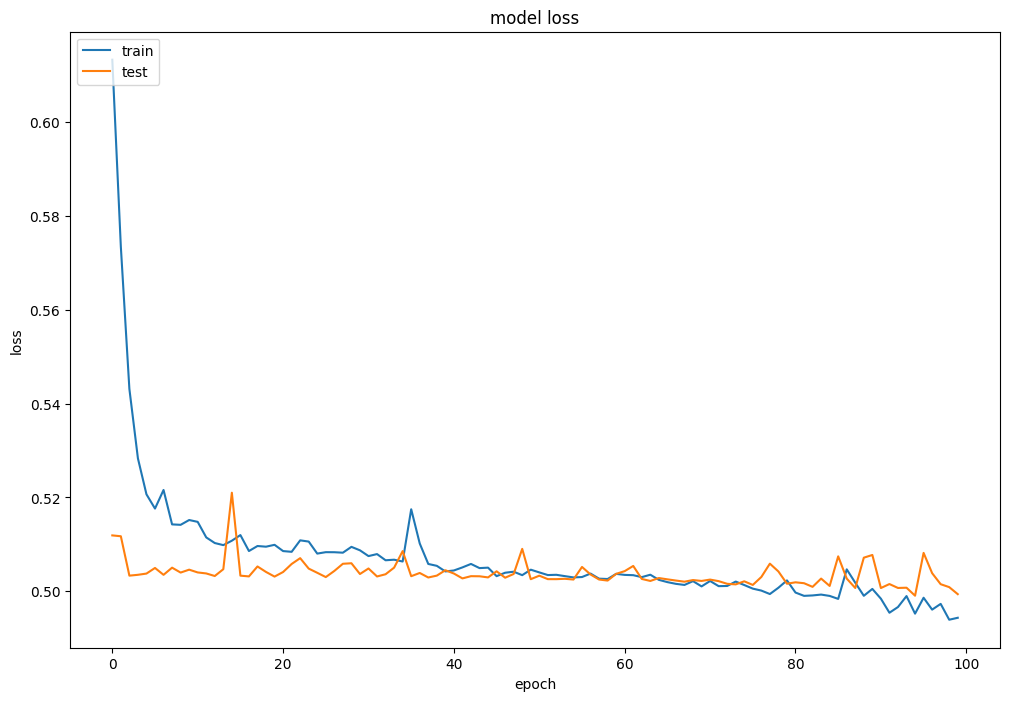

In [ ]:
# fix random seed for reproducibility
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed) # for TF this needs to be run per cell.


model = Sequential()
model.add(Dense(1000, input_dim=14, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


# Compile model
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])

# Fit the model, but this time store the history (that is accuracy and loss for each Epoch)
results = model.fit(normalizedX, Y, validation_split=0.33, epochs=100, batch_size=1000, verbose=1, shuffle=True)


# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/100
21/21 [==============================] - 2s 13ms/step - loss: 0.6188 - acc: 0.7058 - val_loss: 0.5054 - val_acc: 0.7979
Epoch 2/100
21/21 [==============================] - 0s 6ms/step - loss: 0.5763 - acc: 0.7322 - val_loss: 0.5137 - val_acc: 0.7979
Epoch 3/100
21/21 [==============================] - 0s 6ms/step - loss: 0.5488 - acc: 0.7500 - val_loss: 0.5217 - val_acc: 0.7979
Epoch 4/100
21/21 [==============================] - 0s 6ms/step - loss: 0.5317 - acc: 0.7723 - val_loss: 0.5078 - val_acc: 0.7979
Epoch 5/100
21/21 [==============================] - 0s 6ms/step - loss: 0.5262 - acc: 0.7759 - val_loss: 0.5059 - val_acc: 0.7979
Epoch 6/100
21/21 [==============================] - 0s 8ms/step - loss: 0.5158 - acc: 0.7812 - val_loss: 0.5073 - val_acc: 0.7979
Epoch 7/100
21/21 [==============================] - 0s 7ms/step - loss: 0.5152 - acc: 0.7803 - val_loss: 0.5037 - val_acc: 0.7979
Epoch 8/100
21/21 [==============================] - 0s 6ms/step - loss: 0.5126 - 

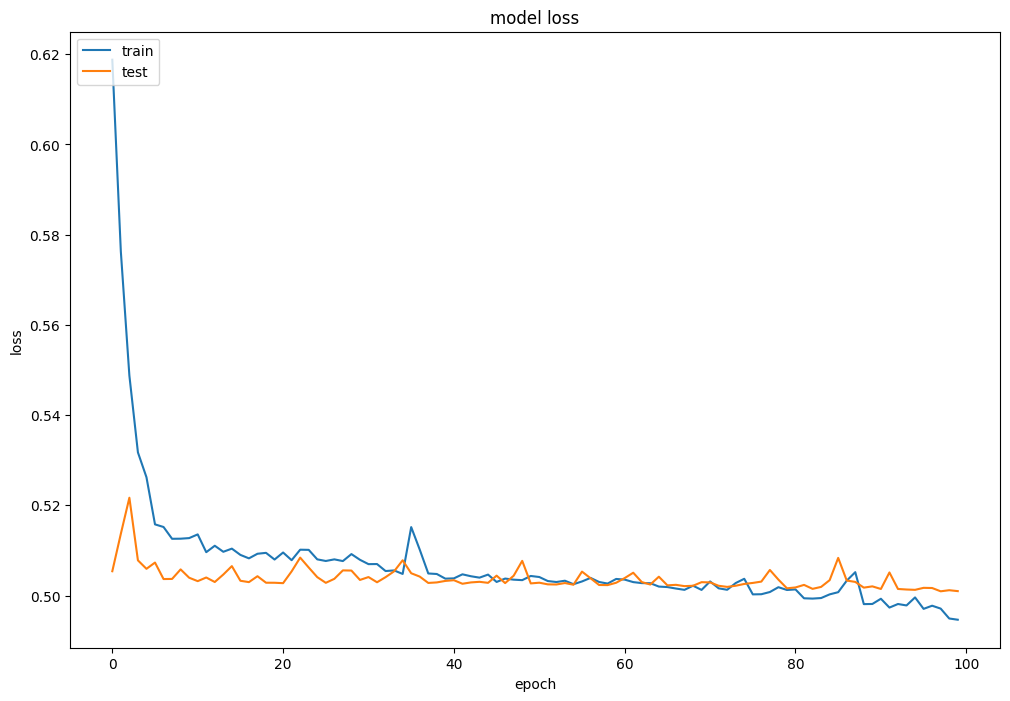

In [ ]:
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed) # for TF this needs to be run per cell.


model = Sequential()
model.add(Dense(1000, input_dim=14, activation='relu', kernel_initializer="GlorotNormal"))
model.add(Dense(100, activation='relu', kernel_initializer="GlorotNormal"))
model.add(Dense(100, activation='relu' , kernel_initializer="GlorotNormal"))
model.add(Dense(50, activation='relu', kernel_initializer="GlorotNormal"))
model.add(Dense(1, activation='sigmoid'))


# Compile model
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])

# Fit the model, but this time store the history (that is accuracy and loss for each Epoch)
results = model.fit(normalizedX, Y, validation_split=0.33, epochs=100, batch_size=1000, verbose=1, shuffle=True)


# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/100
21/21 [==============================] - 3s 13ms/step - loss: 0.6114 - acc: 0.7284 - val_loss: 0.5223 - val_acc: 0.7979
Epoch 2/100
21/21 [==============================] - 0s 6ms/step - loss: 0.5722 - acc: 0.7338 - val_loss: 0.5250 - val_acc: 0.7979
Epoch 3/100
21/21 [==============================] - 0s 6ms/step - loss: 0.5429 - acc: 0.7566 - val_loss: 0.5033 - val_acc: 0.7979
Epoch 4/100
21/21 [==============================] - 0s 6ms/step - loss: 0.5281 - acc: 0.7734 - val_loss: 0.5034 - val_acc: 0.7979
Epoch 5/100
21/21 [==============================] - 0s 8ms/step - loss: 0.5199 - acc: 0.7800 - val_loss: 0.5033 - val_acc: 0.7979
Epoch 6/100
21/21 [==============================] - 0s 8ms/step - loss: 0.5152 - acc: 0.7797 - val_loss: 0.5041 - val_acc: 0.7979
Epoch 7/100
21/21 [==============================] - 0s 6ms/step - loss: 0.5136 - acc: 0.7797 - val_loss: 0.5032 - val_acc: 0.7979
Epoch 8/100
21/21 [==============================] - 0s 6ms/step - loss: 0.5122 - 

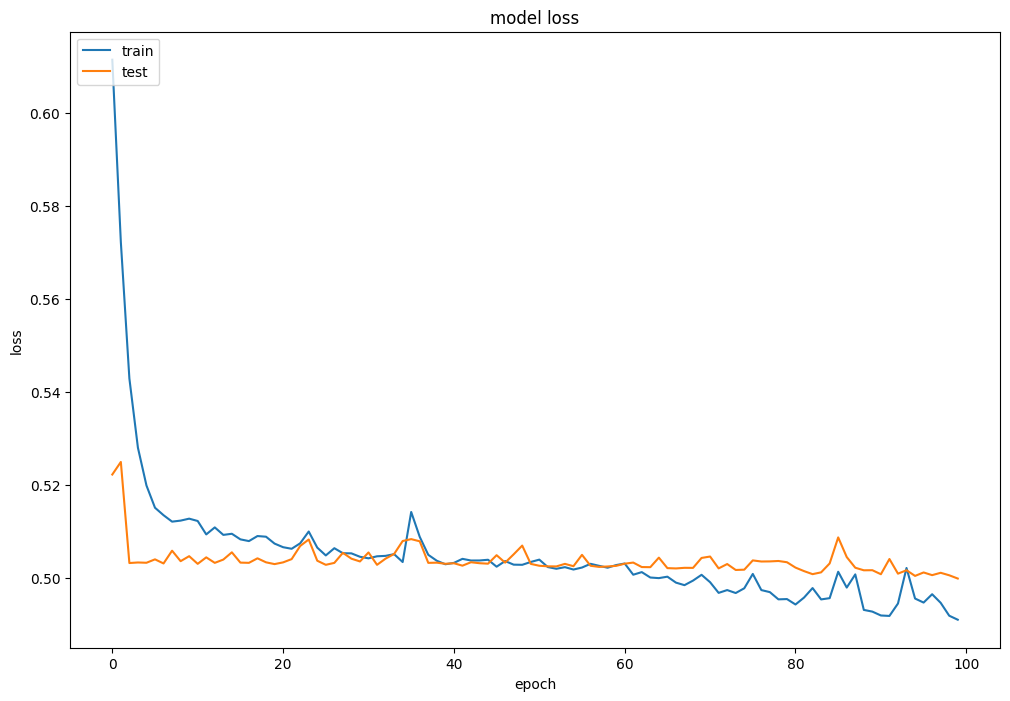

In [ ]:
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed) # for TF this needs to be run per cell.


model = Sequential()
model.add(Dense(1000, input_dim=14, activation='relu', kernel_initializer="GlorotUniform"))
model.add(Dense(100, activation='relu', kernel_initializer="GlorotUniform"))
model.add(Dense(100, activation='relu' , kernel_initializer="GlorotUniform"))
model.add(Dense(50, activation='relu', kernel_initializer="GlorotUniform"))
model.add(Dense(1, activation='sigmoid'))


# Compile model
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])

# Fit the model, but this time store the history (that is accuracy and loss for each Epoch)
results = model.fit(normalizedX, Y, validation_split=0.33, epochs=100, batch_size=1000, verbose=1, shuffle=True)


# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/100
21/21 [==============================] - 2s 15ms/step - loss: 0.6223 - acc: 0.7058 - val_loss: 0.5063 - val_acc: 0.7979
Epoch 2/100
21/21 [==============================] - 0s 6ms/step - loss: 0.5774 - acc: 0.7304 - val_loss: 0.5123 - val_acc: 0.7979
Epoch 3/100
21/21 [==============================] - 0s 8ms/step - loss: 0.5583 - acc: 0.7441 - val_loss: 0.5046 - val_acc: 0.7979
Epoch 4/100
21/21 [==============================] - 0s 7ms/step - loss: 0.5342 - acc: 0.7660 - val_loss: 0.5248 - val_acc: 0.7979
Epoch 5/100
21/21 [==============================] - 0s 6ms/step - loss: 0.5284 - acc: 0.7741 - val_loss: 0.5131 - val_acc: 0.7979
Epoch 6/100
21/21 [==============================] - 0s 7ms/step - loss: 0.5168 - acc: 0.7813 - val_loss: 0.5042 - val_acc: 0.7979
Epoch 7/100
21/21 [==============================] - 0s 8ms/step - loss: 0.5145 - acc: 0.7805 - val_loss: 0.5032 - val_acc: 0.7979
Epoch 8/100
21/21 [==============================] - 0s 6ms/step - loss: 0.5128 - 

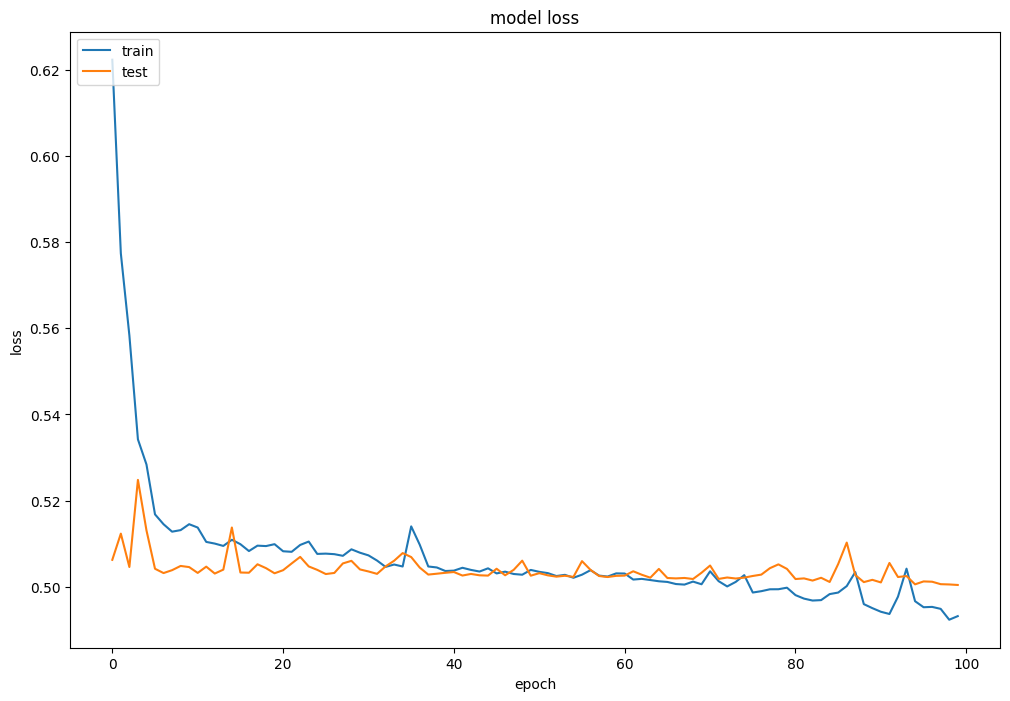

In [ ]:
# fix random seed for reproducibility
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed) # for TF this needs to be run per cell.


model = Sequential()
model.add(Dense(1000, input_dim=14, activation='relu', use_bias = True))
model.add(Dense(100, activation='relu', use_bias = True))
model.add(Dense(100, activation='relu', use_bias = True))
model.add(Dense(50, activation='relu' , use_bias = True))
model.add(Dense(1, activation='sigmoid'))


# Compile model
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])

# Fit the model, but this time store the history (that is accuracy and loss for each Epoch)
results = model.fit(normalizedX, Y, validation_split=0.33, epochs=100, batch_size=1000, verbose=1, shuffle=True)


# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/100
21/21 [==============================] - 2s 21ms/step - loss: 0.6243 - acc: 0.7066 - val_loss: 0.5036 - val_acc: 0.7979
Epoch 2/100
21/21 [==============================] - 0s 9ms/step - loss: 0.5744 - acc: 0.7338 - val_loss: 0.5153 - val_acc: 0.7979
Epoch 3/100
21/21 [==============================] - 0s 10ms/step - loss: 0.5424 - acc: 0.7550 - val_loss: 0.5057 - val_acc: 0.7979
Epoch 4/100
21/21 [==============================] - 0s 10ms/step - loss: 0.5239 - acc: 0.7779 - val_loss: 0.5120 - val_acc: 0.7979
Epoch 5/100
21/21 [==============================] - 0s 10ms/step - loss: 0.5234 - acc: 0.7777 - val_loss: 0.5059 - val_acc: 0.7979
Epoch 6/100
21/21 [==============================] - 0s 10ms/step - loss: 0.5150 - acc: 0.7810 - val_loss: 0.5062 - val_acc: 0.7979
Epoch 7/100
21/21 [==============================] - 0s 10ms/step - loss: 0.5141 - acc: 0.7803 - val_loss: 0.5031 - val_acc: 0.7979
Epoch 8/100
21/21 [==============================] - 0s 7ms/step - loss: 0.51

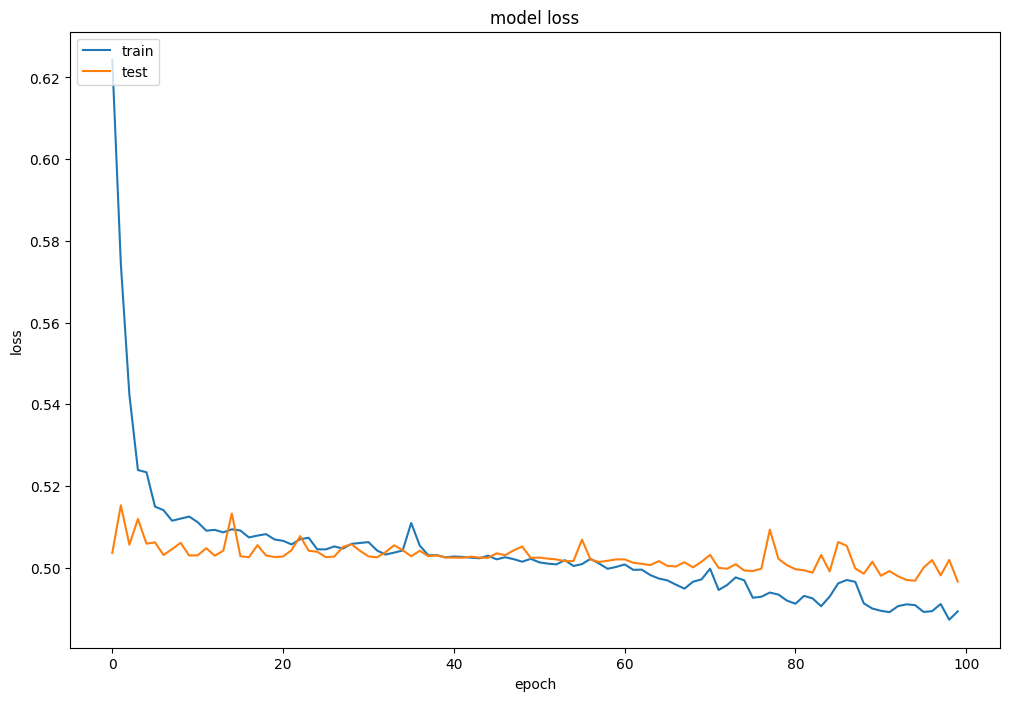

In [ ]:
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed) # for TF this needs to be run per cell.


model = Sequential()
model.add(Dense(1000, input_dim=14, activation='relu', use_bias = False))
model.add(Dense(100, activation='relu', use_bias = False))
model.add(Dense(100, activation='relu', use_bias = False))
model.add(Dense(50, activation='relu' , use_bias = False))
model.add(Dense(1, activation='sigmoid'))


# Compile model
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])

# Fit the model, but this time store the history (that is accuracy and loss for each Epoch)
results = model.fit(normalizedX, Y, validation_split=0.33, epochs=100, batch_size=1000, verbose=1, shuffle=True)


# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/100
21/21 [==============================] - 2s 14ms/step - loss: 0.6227 - acc: 0.7101 - val_loss: 0.5416 - val_acc: 0.7979
Epoch 2/100
21/21 [==============================] - 0s 7ms/step - loss: 0.5827 - acc: 0.7309 - val_loss: 0.5149 - val_acc: 0.7979
Epoch 3/100
21/21 [==============================] - 0s 7ms/step - loss: 0.5682 - acc: 0.7434 - val_loss: 0.5468 - val_acc: 0.7979
Epoch 4/100
21/21 [==============================] - 0s 7ms/step - loss: 0.5499 - acc: 0.7626 - val_loss: 0.5181 - val_acc: 0.7979
Epoch 5/100
21/21 [==============================] - 0s 6ms/step - loss: 0.5407 - acc: 0.7682 - val_loss: 0.5103 - val_acc: 0.7979
Epoch 6/100
21/21 [==============================] - 0s 7ms/step - loss: 0.5384 - acc: 0.7701 - val_loss: 0.5069 - val_acc: 0.7979
Epoch 7/100
21/21 [==============================] - 0s 6ms/step - loss: 0.5374 - acc: 0.7691 - val_loss: 0.5070 - val_acc: 0.7979
Epoch 8/100
21/21 [==============================] - 0s 6ms/step - loss: 0.5368 - 

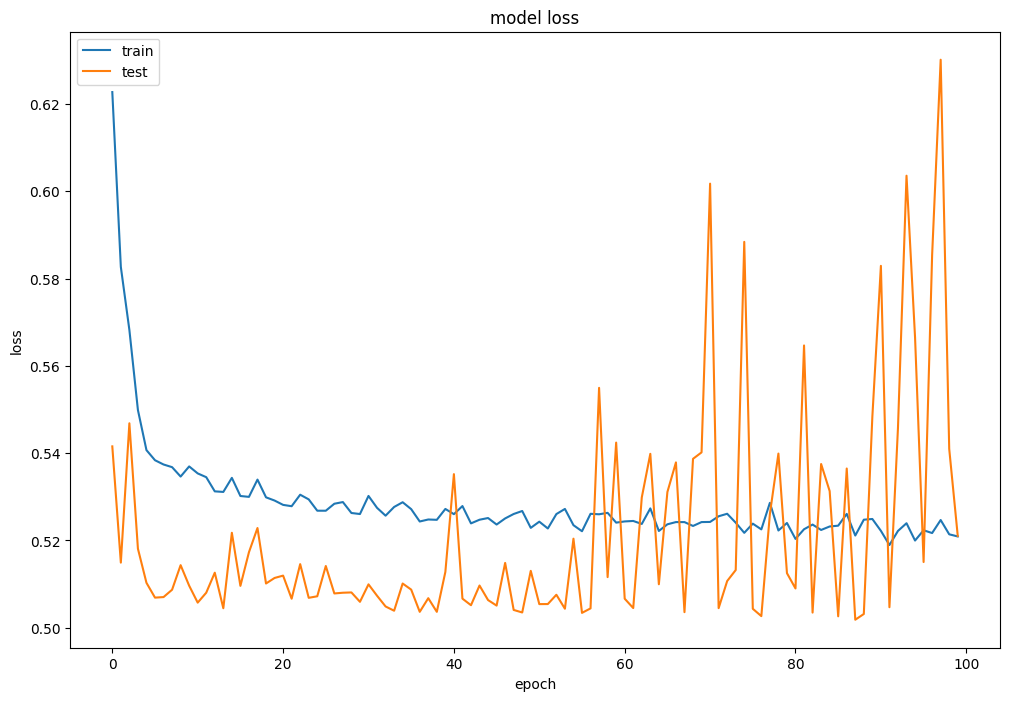

In [ ]:
# fix random seed for reproducibility
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed) # for TF this needs to be run per cell.


model = Sequential()
model.add(Dropout(0.2, input_shape =(14,)))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))


# Compile model
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])

# Fit the model, but this time store the history (that is accuracy and loss for each Epoch)
results = model.fit(normalizedX, Y, validation_split=0.33, epochs=100, batch_size=1000, verbose=1, shuffle=True)


# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/100
21/21 [==============================] - 2s 16ms/step - loss: 0.6021 - acc: 0.7215 - val_loss: 0.5703 - val_acc: 0.7979
Epoch 2/100
21/21 [==============================] - 0s 6ms/step - loss: 0.5884 - acc: 0.7280 - val_loss: 0.5463 - val_acc: 0.7979
Epoch 3/100
21/21 [==============================] - 0s 6ms/step - loss: 0.5842 - acc: 0.7280 - val_loss: 0.5283 - val_acc: 0.7979
Epoch 4/100
21/21 [==============================] - 0s 6ms/step - loss: 0.5815 - acc: 0.7281 - val_loss: 0.5203 - val_acc: 0.7979
Epoch 5/100
21/21 [==============================] - 0s 8ms/step - loss: 0.5785 - acc: 0.7282 - val_loss: 0.5152 - val_acc: 0.7979
Epoch 6/100
21/21 [==============================] - 0s 6ms/step - loss: 0.5770 - acc: 0.7299 - val_loss: 0.5141 - val_acc: 0.7979
Epoch 7/100
21/21 [==============================] - 0s 8ms/step - loss: 0.5706 - acc: 0.7375 - val_loss: 0.5049 - val_acc: 0.7979
Epoch 8/100
21/21 [==============================] - 0s 8ms/step - loss: 0.5570 - 

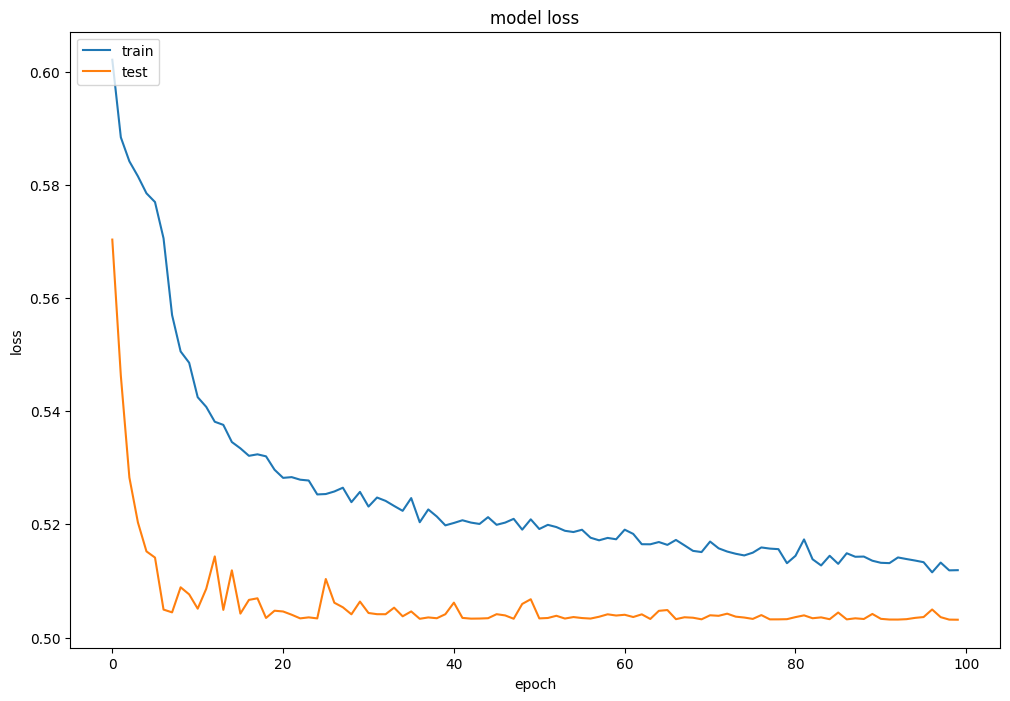

In [ ]:
# fix random seed for reproducibility
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed) # for TF this needs to be run per cell.


model = Sequential()
model.add(Dense(1000, input_dim=14, activation='relu'))
model.add(GaussianNoise(0.1))
model.add(Dense(100, activation='relu'))
model.add(GaussianNoise(0.1))
model.add(Dense(100, activation='relu'))
model.add(GaussianNoise(0.1))
model.add(Dense(50, activation='relu'))
model.add(GaussianNoise(0.1))
model.add(Dense(1, activation='sigmoid'))


# Compile model
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])

# Fit the model, but this time store the history (that is accuracy and loss for each Epoch)
results = model.fit(normalizedX, Y, validation_split=0.33, epochs=100, batch_size=1000, verbose=1, shuffle=True)


# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()